## SDC Behavior Cloning Project
 #### Requirements
    * collecting the data of driving behavior from provide simulator or using Udacity data
    * using the data to train Neural Nework model in python
    * file naming requirments:
        * main file: model.py
        * script to drive the car: drive.py
        * weightsL model.h5
        * design and structure of the network: README.md
    * track to be evaluated on: the first track (the one to the left from the simulator options)
    * simulation requirements
        * no tire may leave the drivable portion of the track surface
        * the car may not pop up onto ledgess or roll over any surfaces that would otherwise be considered unsafe 
 

#### Data Observation

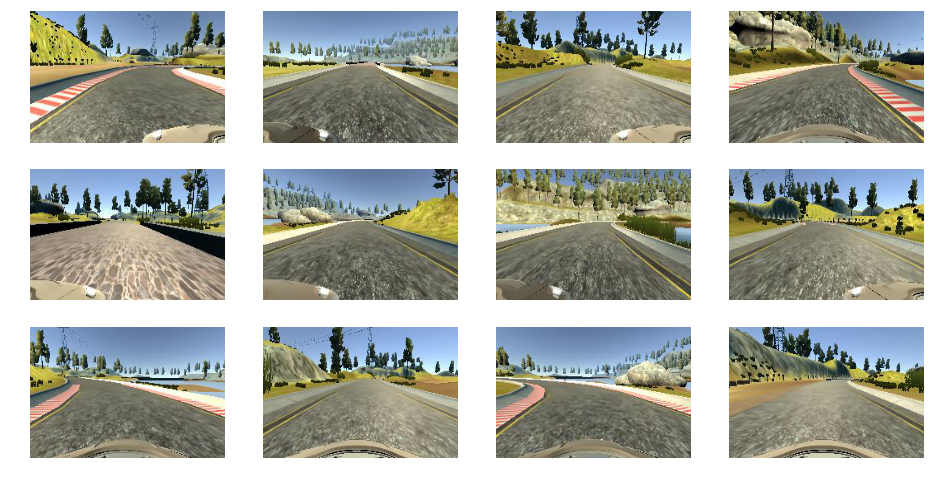

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random, os

%matplotlib inline

path = r"data/IMG/"
random_filename = [None] * 12
plt.rcParams['figure.figsize'] = (16, 8)
for i in range(12):
    random_filename[i] = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path, x))])
    image = mpimg.imread(path+random_filename[i])
    plt.subplot(3, 4, i+1)
    plt.imshow(image, aspect='auto')
    plt.axis('off')

     * Top part and bottom part of the images are not necessary. Cropping out those parts will save in-memory usage
     * driving_log.csv has:

In [3]:
import pandas as pd
data_frame = pd.read_csv('data/driving_log.csv', index_col=False)
data_frame.describe(include='all')

,center,left,right,steering,throttle,brake,speed
count,8036,8036,8036,8036.000000,8036.000000,8036.000000,8036.000000
unique,8036,8036,8036,NaN,NaN,NaN,NaN
top,IMG/center_2016_12_01_13_46_15_535.jpg,IMG/left_2016_12_01_13_40_12_489.jpg,IMG/right_2016_12_01_13_39_43_637.jpg,NaN,NaN,NaN,NaN
freq,1,1,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.004070,0.869660,0.001970,28.169839
std,NaN,NaN,NaN,0.128840,0.301326,0.036565,6.149327
min,NaN,NaN,NaN,-0.942695,0.000000,0.000000,0.502490
25%,NaN,NaN,NaN,0.000000,0.985533,0.000000,30.183093
50%,NaN,NaN,NaN,0.000000,0.985533,0.000000,30.186400
75%,NaN,NaN,NaN,0.000000,0.985533,0.000000,30.186640


In [4]:
data_frame.shape

(8036, 7)

     * total of 8036 rows that has three camera images and steering, throttle, break and speed
     * I would use steering as labels and images as input features. But which image of three to be used will be randomly decided

 #### Lesson learned from P2 and from fellow cohorts
     * I was having a lot of issues with training my model on project2 since I did not do data augmentation
     * so this time I tried to look up realted data augmentation topic for training data especially on image data
     * I have read some papers, posts and read the forums, slack channels to decide to augment the data this time

before cropped


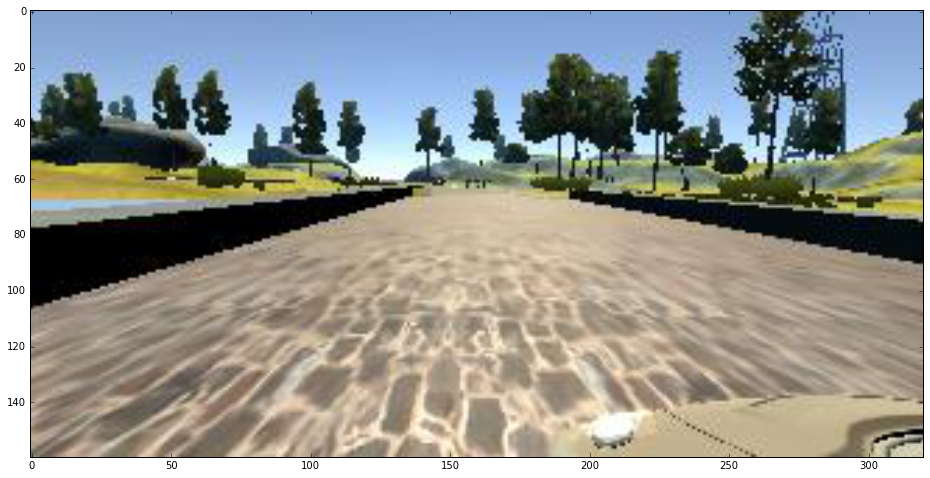

In [12]:
image = mpimg.imread("data/"+data_frame.iloc[0][1].strip())
cropped = image[40:135, 0:320]
print('before cropped')
plt.figure()
plt.imshow(image)
plt.show()

after cropped


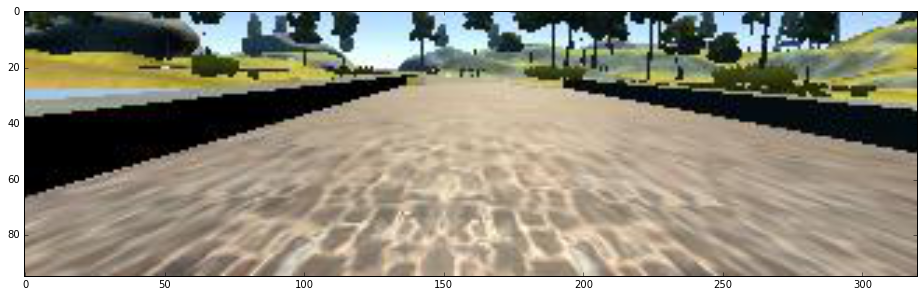

In [11]:
print('after cropped')
plt.figure()
plt.imshow(cropped)
plt.show()

## Augmentation

1. crop the images to remove non-useful part of the images. (the size of the crop will be tuned as training goes)
2. add the small degree to left camera to get closer to center as substracting small degree from right camera to get closer to center for simulating recovery. (the angle units will be tuned as training goes)
3. flip the images horizontally to simulate right turn since data has more left turn since the track has more left turn than right. 
4. adjust the brightness of images using one of the suggestions from the above materials (to simulate the different weather conditions).
5. using the suggestions from <a href="https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9#.ulbf1oge4">this post</a> to augment data minimally.

##### Steering column distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113867da0>]], dtype=object)

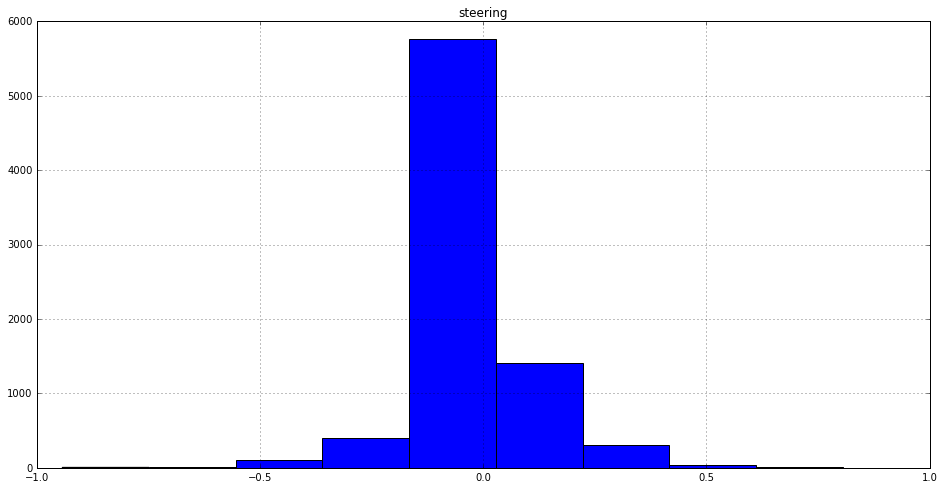

In [21]:
data_frame.hist(column='steering')

##### Throttle distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1138649e8>]], dtype=object)

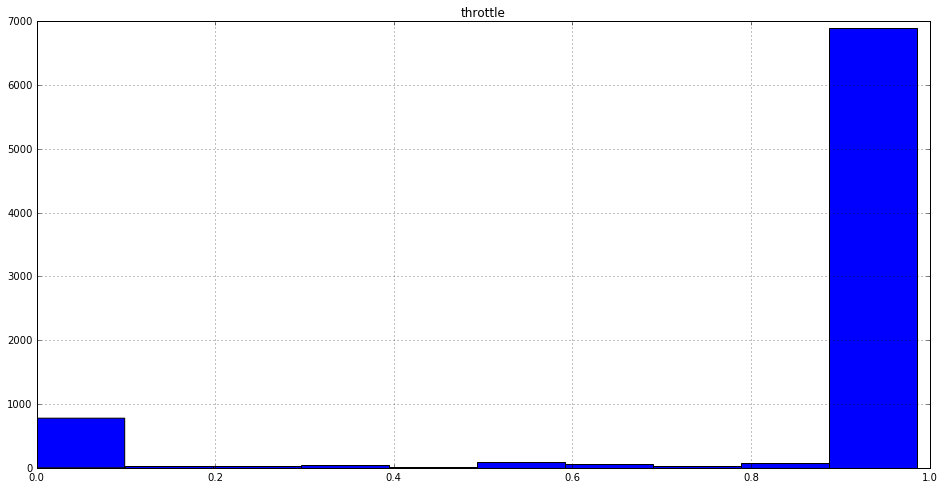

In [22]:
data_frame.hist(column='throttle')

    * Looking at the two distributions above I am not sure what is the coorelation between these two and the other columns.
    * So since I have no knowledge on how to train multi-lables network with one feature I will just use the steering data. This is what I would like to explore when the times allowed later.
    * negative values of steering column are more than positive values which can be recognized as there are more left than right on the track that this data has ben taken. Something to note about and use it when tuning the model.

after resized


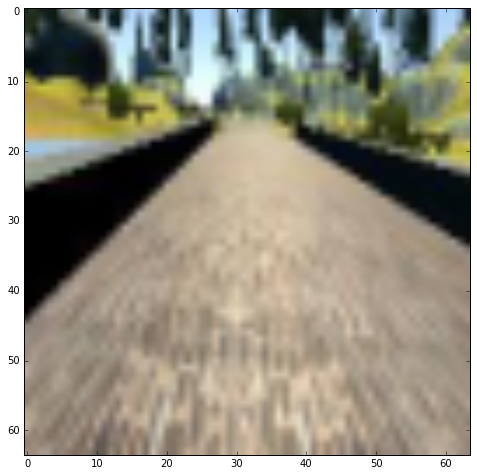

In [19]:
import cv2
resized = cv2.resize(cropped, (64, 64), interpolation=cv2.INTER_AREA)
print('after resized')
plt.figure()
plt.imshow(resized)
plt.show()

flipped horizontally


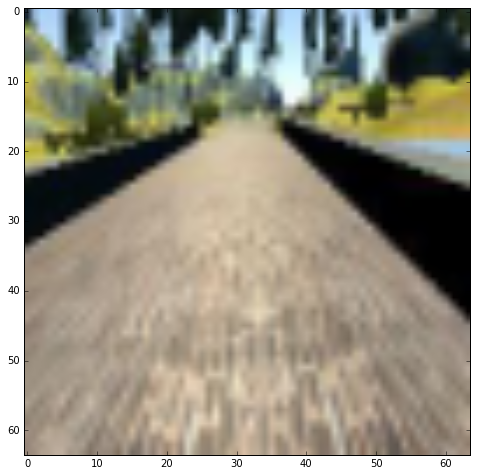

In [20]:
flipped = cv2.flip(resized, 1)
print('flipped horizontally')
plt.figure()
plt.imshow(flipped)
plt.show()

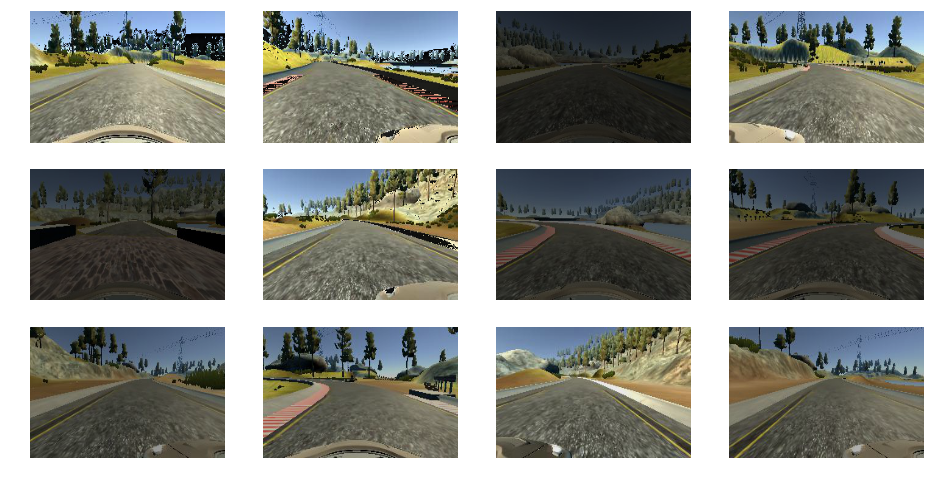

In [18]:
path = r"data/IMG/"
random_filename = [None] * 12
plt.rcParams['figure.figsize'] = (16, 8)
for i in range(12):
    random_filename[i] = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path, x))])
    image = mpimg.imread(path+random_filename[i])
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1[:,:,2] = image1[:,:,2]*(.25+ np.random.uniform())
    image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    plt.subplot(3, 4, i+1)
    plt.imshow(image1, aspect='auto')
    plt.axis('off')

With that and suggestions from forum, slack channel, and above post, I decided to do following to the data:
    * read the csv file
    * split the training and validation
    * pull the each row of the file
    * decide which image to use randomly
    * add some angle adjustment depend on the image that randomly pulled
    * change the color space of image
    * adjust the brightness randomly
    * crop the image
    * resize the image    
    * flip half of the images
    * then set up a model using keras with Tensorflow Backend
    * and train using keras fit_generator as recommended by Udacity